<a href="https://colab.research.google.com/github/k-vinamr/rera_construction_pred/blob/main/22_oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
# Load your dataset
data = pd.read_csv('new_6_floor.csv')  # Replace with your actual data file

In [ ]:
# Converting date columns to datetime objects
data['actual_commencement_date'] = pd.to_datetime(data['actual_commencement_date'], format='%d-%m-%Y', errors='coerce')
data['estimated_finish_date'] = pd.to_datetime(data['estimated_finish_date'], format='%d-%m-%Y', errors='coerce')

In [ ]:
current_date = datetime.now()

In [ ]:
data['duration_since_commencement'] = (current_date - data['actual_commencement_date']).dt.days
data['remaining_duration'] = (data['estimated_finish_date'] - current_date).dt.days
data['progress_ratio'] = data['duration_since_commencement'] / data['total_days']

In [ ]:
# Define a function to determine the project status
def determine_status(row):
    if current_date > row['estimated_finish_date']:
        return 'completed'
    elif current_date >= row['actual_commencement_date']:
        return 'running'
    else:
        return 'upcoming'

# Apply the function to create the 'Status' column
data['current_stage'] = data.apply(determine_status, axis=1)

# Print the DataFrame with the 'Status' column
data

,organisation_name,project_category,actual_commencement_date,estimated_finish_date,total_built_up_area_saleable_area,total_area_of_project,floor,project_state,total_days,Cleaning & survey,...,"Electrical concealed, PVC Fitting, plastering at 3rd-6th floor",Plastering on outer sides,Tiles work,Painting and Finishing,"Plumbing & Sanitary,Electrification Works",Doors & Windows Fixing Furniture work,duration_since_commencement,remaining_duration,progress_ratio,current_stage
0,NITIN Last Name DOLKE,Residential/Group Housing,2022-02-16,2022-06-02,1251.72,480.0,6,MAHARASHTRA,106,0.633214,...,8.864994,9.498208,7.598566,10.131422,5.698925,8.864994,614,-509,5.792453,completed
1,SARYASH CONSTRUCTIONS,Residential/Group Housing,2018-04-13,2018-07-31,464.66,279.0,6,MAHARASHTRA,109,0.651135,...,9.115890,9.767025,7.813620,10.418160,5.860215,9.115890,2019,-1911,18.522936,completed
2,Murtuz Abdul Razzaque Kotkunde,Residential/Group Housing,2021-09-13,2021-12-31,417.71,226.6,6,MAHARASHTRA,109,0.651135,...,9.115890,9.767025,7.813620,10.418160,5.860215,9.115890,770,-662,7.064220,completed
3,PATIL AND MANURE ASSOCIATES,Residential/Group Housing,2021-09-09,2021-12-30,690.65,511.5,6,MAHARASHTRA,112,0.669056,...,9.366786,10.035842,8.028674,10.704898,6.021505,9.366786,774,-663,6.910714,completed
4,GANGA BUILDERS AND DEVELOPERS,Residential/Group Housing,2021-09-09,2021-12-30,965.40,471.0,6,MAHARASHTRA,112,0.669056,...,9.366786,10.035842,8.028674,10.704898,6.021505,9.366786,774,-663,6.910714,completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,SARWDNYA BUILDCON,Residential/Group Housing,2022-04-01,2029-12-31,2351.60,837.0,6,MAHARASHTRA,2831,16.911589,...,236.762246,253.673835,202.939068,270.585424,152.204301,236.762246,570,2260,0.201342,running
1368,ABHISHEK SUBHASH NIKAM,Residential/Group Housing,2022-10-27,2030-12-31,9163.48,3557.3,6,MAHARASHTRA,2987,17.843489,...,249.808841,267.652330,214.121864,285.495818,160.591398,249.808841,361,2625,0.120857,running
1369,MANSI BUILDERS AND DEVELOPERS,Residential/Group Housing,2021-09-09,2030-03-31,9597.12,9100.0,6,MAHARASHTRA,3125,18.667861,...,261.350060,280.017921,224.014337,298.685783,168.010753,261.350060,774,2350,0.247680,running
1370,DATTATRAY DINKAR CHAVAN,Residential/Group Housing,2022-12-12,2032-12-31,2398.58,1700.5,6,MAHARASHTRA,3672,21.935484,...,307.096774,329.032258,263.225806,350.967742,197.419355,307.096774,315,3356,0.085784,running


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 44 columns):
 #   Column                                                                     Non-Null Count  Dtype         
---  ------                                                                     --------------  -----         
 0   organisation_name                                                          1372 non-null   object        
 1   project_category                                                           1372 non-null   object        
 2   actual_commencement_date                                                   1372 non-null   datetime64[ns]
 3   estimated_finish_date                                                      1372 non-null   datetime64[ns]
 4   total_built_up_area_saleable_area                                          1372 non-null   float64       
 5   total_area_of_project                                                      1372 non-null   float64       
 6   

In [ ]:
# Performing label encoding on the 'current_stage' column
label_encoder = LabelEncoder()
data['current_stage'] = data['current_stage'].astype(str) # Converting to string to handle any NaN values left
data['current_stage_encoded'] = label_encoder.fit_transform(data['current_stage'])

In [ ]:
# Performing label encoding on the 'current_stage' column
label_encoder = LabelEncoder()
data['project_state'] = data['project_state'].astype(str) # Converting to string to handle any NaN values left
data['project_state_encoded'] = label_encoder.fit_transform(data['project_state'])

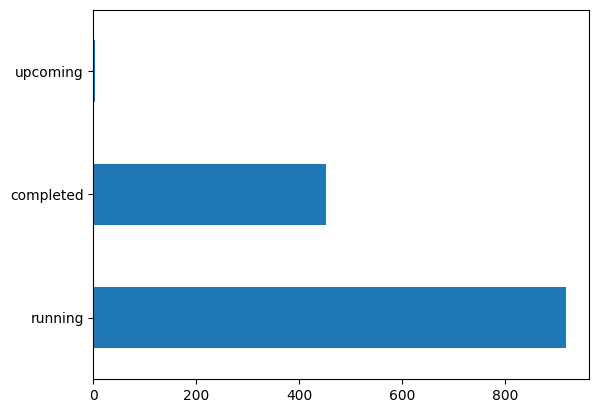

In [ ]:
(data['current_stage'].value_counts()).plot(kind='barh'); plt.show()

In [ ]:
data['total_days'].describe()

count    1372.000000
mean      922.384840
std       473.049524
min       106.000000
25%       592.000000
50%       882.500000
75%      1143.000000
max      3764.000000
Name: total_days, dtype: float64

In [ ]:
# Feature selection - use relevant features for input
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
stage_columns = [ 'Cleaning & survey',
 'Excavation,leveling & P.C.C  for Basement  B1 ',
 ' Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring ',
 'Slab of B (bottom) ',
 ' Ground Floor slab casting ',
 ' 1st floor Columns casting',
 ' 1st Floor slab casting',
 '2nd floor Columns casting ',
 '2nd Floor slab casting',
 ' Brick work at Basement to Ground Floor ',
 '3rd floor Columns casting ',
 '3rd Floor slab casting',
 ' Brick work at 1st Floor ',
 'Electrical concealed, PVC Fitting, plastering at basement- ground floor',
 '4th floor Columns casting ',
 '4th Floor slab casting',
 ' Brick work at 2nd Floor ',
 'Electrical concealed, PVC Fitting, plastering at 1st floor',
 '5th floor Columns casting ',
 '5th Floor slab casting',
 ' Brick work at 3rd Floor ',
 'Electrical concealed, PVC Fitting, plastering at 2nd floor',
 '6th floor Columns casting ',
 '6th Floor slab casting',
 ' Brick work of 4th to 6th Floor ',
 'Electrical concealed, PVC Fitting, plastering at 3rd-6th floor',
 'Plastering on outer sides',
 'Tiles work',
 'Painting and Finishing',
 'Plumbing & Sanitary,Electrification Works',
 'Doors & Windows Fixing Furniture work']
# Target variables
X = data[numerical_columns.columns.difference(stage_columns)].drop(columns='total_days')
y_total_days = data['total_days']
y_time_taken_at_each_stage = data[stage_columns]  # Replace with your actual stage columns

In [ ]:
X.columns

Index(['current_stage_encoded', 'duration_since_commencement', 'floor',
       'progress_ratio', 'project_state_encoded', 'remaining_duration',
       'total_area_of_project', 'total_built_up_area_saleable_area'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have loaded your data and defined 'X' and 'y_total_days' as specified

# Split the data into training and testing sets
X_train, X_test, y_train_total_days, y_test_total_days = train_test_split(
    X, y_total_days, test_size=0.2, random_state=42)

# Create a function to train a Random Forest regression model, make predictions, and evaluate its performance
def train_evaluate_model(X_train, X_test, y_train_total_days, y_test_total_day):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train_total_days)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test_total_days, y_pred)
    r2 = r2_score(y_test_total_days, y_pred)
    return mse, r2

# Initial model performance
initial_mse, initial_r2 = train_evaluate_model(X_train, X_test, y_train_total_days, y_test_total_days)
feature_impact = {}

for column in X.columns:
    X_temp = X.drop(columns=[column])
    mse, r2 = train_evaluate_model(X_train, X_test, y_train_total_days, y_test_total_days)
    mse_change = initial_mse - mse
    r2_change = r2 - initial_r2
    feature_impact[column] = {'MSE Change': mse_change, 'R-squared Change': r2_change}

# Print the impact of removing each feature
for column, impact in feature_impact.items():
    print(f"Removed '{column}':")
    print(f"MSE Change: {impact['MSE Change']:.2f}")
    print(f"R-squared Change: {impact['R-squared Change']:.4f}\n")


Removed 'current_stage_encoded':
MSE Change: 0.00
R-squared Change: 0.0000

Removed 'duration_since_commencement':
MSE Change: 0.00
R-squared Change: 0.0000

Removed 'floor':
MSE Change: 0.00
R-squared Change: 0.0000

Removed 'progress_ratio':
MSE Change: 0.00
R-squared Change: 0.0000

Removed 'project_state_encoded':
MSE Change: 0.00
R-squared Change: 0.0000

Removed 'remaining_duration':
MSE Change: 0.00
R-squared Change: 0.0000

Removed 'total_area_of_project':
MSE Change: 0.00
R-squared Change: 0.0000

Removed 'total_built_up_area_saleable_area':
MSE Change: 0.00
R-squared Change: 0.0000



In [ ]:
# Train a Random Forest model on the entire dataset
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y_total_days)

# Get feature importances
importances = model.feature_importances_

# Pair feature names with their importance scores
feature_importance = list(zip(X.columns, importances))

# Sort features by importance (in descending order)
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

remaining_duration: 0.6824
progress_ratio: 0.1639
duration_since_commencement: 0.1500
total_built_up_area_saleable_area: 0.0019
total_area_of_project: 0.0014
project_state_encoded: 0.0003
current_stage_encoded: 0.0001
floor: 0.0000


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train_total_days, y_test_total_days, y_train_time, y_test_time = train_test_split(
    X, y_total_days, y_time_taken_at_each_stage, test_size=0.2, random_state=42)

# Create and train the regression model for total days
total_days_model = RandomForestRegressor(n_estimators=100, random_state=42)
total_days_model.fit(X_train, y_train_total_days)

# Predict total days on the test set
y_pred_total_days = total_days_model.predict(X_test)

# Evaluate the model for total days
mse_total_days = mean_squared_error(y_test_total_days, y_pred_total_days)
r2_total_days = r2_score(y_test_total_days, y_pred_total_days)
print(f'Mean Squared Error (Total Days): {mse_total_days}')
print(f'R-squared (Total Days): {r2_total_days}')

Mean Squared Error (Total Days): 6177.09565781818
R-squared (Total Days): 0.9723451693015058


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
# Define a custom scorer for cross-validation
mse_scorer = make_scorer(mean_squared_error)  # Use make_scorer to create the custom scorer

# Perform K-Fold Cross-Validation
k = 5  # You can adjust the number of folds
cv_scores = cross_val_score(total_days_model, X, y_total_days, cv=k, scoring=mse_scorer)

# Print the mean and standard deviation of MSE scores
print("Cross-Validation Mean MSE:", np.mean(cv_scores))
print("Cross-Validation MSE Std Dev:", np.std(cv_scores))


Cross-Validation Mean MSE: 76502.01477014174
Cross-Validation MSE Std Dev: 116605.61679240287


In [ ]:
# Create and train the regression model for time taken at each stage
stage_models = {}
for stage in stage_columns:
    stage_model = RandomForestRegressor(n_estimators=100, random_state=42)
    stage_model.fit(X_train, y_train_time[stage])
    stage_models[stage] = stage_model

# Predict time taken at each stage on the test set
y_pred_time = {}
for stage, stage_model in stage_models.items():
    y_pred_time[stage] = stage_model.predict(X_test)

In [ ]:
# Assuming you have already converted 'actual_commencement_date' to a datetime object
# Calculate days elapsed for each project
current_date = datetime.now()
data['days_elapsed'] = (current_date - data['actual_commencement_date']).dt.days

# Define a function to determine the relevant stage and relevant columns for each project
def determine_relevant_stage_and_columns(row):
    days_elapsed = row['days_elapsed']
    total_days = 0
    relevant_stage = None
    relevant_columns = []

    for stage in stage_columns:
        stage_duration = row[stage]  # Days required for the current stage
        total_days += stage_duration
        if total_days >= days_elapsed:
            relevant_stage = stage
            relevant_columns = [stage for stage in stage_columns[stage_columns.index(stage):]]
            break

    return relevant_stage, relevant_columns, total_days

# Apply the function to create the 'relevant_stage' and 'relevant_columns' columns
data[['relevant_stage', 'relevant_columns', 'total_days']] = data.apply(determine_relevant_stage_and_columns, axis=1, result_type='expand')

# Filter projects based on current_stage
completed_projects = data[data['current_stage'] == 'completed']
running_projects = data[data['current_stage'] == 'running']
upcoming_projects = data[data['current_stage'] == 'upcoming']

# Define a function to make predictions based on the current stage
def make_predictions(row):
    if row['current_stage'] == 'completed':
        return None  # No predictions for completed projects
    elif row['current_stage'] == 'running':
        if row['relevant_stage'] is not None:
            if row['relevant_stage'] in row['relevant_columns']:
                return row[row['relevant_stage']] - (row['days_elapsed'] - row['total_days'])
            else:
                return None  # Skip stages before the relevant stage
        else:
            return None  # Skip predictions for running projects with no relevant stage
    elif row['current_stage'] == 'upcoming':
        return row['total_days']  # Include all stages for upcoming projects

# Apply the make_predictions function to create the 'predicted_time_taken' column
data['predicted_time_taken'] = data.apply(make_predictions, axis=1)


In [ ]:
# Evaluate the models for time taken at each stage
mse_stage = {}
r2_stage = {}
for stage in stage_columns:
    mse_stage[stage] = mean_squared_error(y_test_time[stage], y_pred_time[stage])
    r2_stage[stage] = r2_score(y_test_time[stage], y_pred_time[stage])
    print(f'Mean Squared Error ({stage}): {mse_stage[stage]}')
    print(f'R-squared ({stage}): {r2_stage[stage]}')

Mean Squared Error (Cleaning & survey): 0.20970829041379363
R-squared (Cleaning & survey): 0.9736904642676982
Mean Squared Error (Excavation,leveling & P.C.C  for Basement  B1 ): 3.4500884589369933
R-squared (Excavation,leveling & P.C.C  for Basement  B1 ): 0.9729474734285821
Mean Squared Error ( Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring ): 6.555514260353613
R-squared ( Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring ): 0.9717956022022909
Mean Squared Error (Slab of B (bottom) ): 1.8642103801748016
R-squared (Slab of B (bottom) ): 0.9740133679630607
Mean Squared Error ( Ground Floor slab casting ): 6.819727157462652
R-squared ( Ground Floor slab casting ): 0.9727172256927569
Mean Squared Error ( 1st floor Columns casting): 1.0400898353635155
R-squared ( 1st floor Columns casting): 0.973039802148444
Mean Squared Error ( 1st Floor slab casting): 3.4500884589369933
R-squared ( 1st Floor slab casting): 0.9729474734285821
Mean Squared Er

In [ ]:
# Load the new data (replace 'new_data.csv' with the actual file path)
new_data = pd.read_csv('test_6_floor.csv')

In [ ]:
# Converting date columns to datetime objeacts
new_data['actual_commencement_date'] = pd.to_datetime(new_data['actual_commencement_date'], format='%d-%m-%Y', errors='coerce')
new_data['estimated_finish_date'] = pd.to_datetime(new_data['estimated_finish_date'], format='%d-%m-%Y', errors='coerce')

In [ ]:
current_date = datetime.now()

In [ ]:
new_data['total_days'] = (new_data['estimated_finish_date'] - new_data['actual_commencement_date']).dt.days

In [ ]:
new_data['duration_since_commencement'] = (current_date - new_data['actual_commencement_date']).dt.days
new_data['remaining_duration'] = (new_data['estimated_finish_date'] - current_date).dt.days
new_data['progress_ratio'] = new_data['duration_since_commencement'] / new_data['total_days']

In [ ]:
# Define a function to determine the project status
def determine_status(row):
    if current_date > row['estimated_finish_date']:
        return 'completed'
    elif current_date >= row['actual_commencement_date']:
        return 'running'
    else:
        return 'upcoming'

# Apply the function to create the 'Status' column
new_data['current_stage'] = new_data.apply(determine_status, axis=1)

# Print the DataFrame with the 'Status' column
new_data

,organisation_name,project_category,actual_commencement_date,estimated_finish_date,total_built_up_area_saleable_area,total_area_of_project,floor,project_state,total_days,duration_since_commencement,remaining_duration,progress_ratio,current_stage
0,Shilp Constructions,Residential/Group Housing,2017-07-29,2018-06-30,699.68,397.50,6,MAHARASHTRA,336,2277,-1942,6.776786,completed
1,ABC AND MITTAL REALTY,Residential/Group Housing,2017-07-29,2018-06-30,2149.53,1918.45,6,MAHARASHTRA,336,2277,-1942,6.776786,completed
2,VASUDHA DEVELOPERS,Residential/Group Housing,2022-01-29,2022-12-31,1390.16,790.00,6,MAHARASHTRA,336,632,-297,1.880952,completed
3,Sarthak & Shanti Associates,Residential/Group Housing,2017-07-29,2018-06-30,2160.00,1800.00,6,MAHARASHTRA,336,2277,-1942,6.776786,completed
4,Mahalaxmi Builders & Developers,Residential/Group Housing,2022-01-29,2022-12-31,436.20,278.00,6,MAHARASHTRA,336,632,-297,1.880952,completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,SARWDNYA BUILDCON,Residential/Group Housing,2022-04-01,2029-12-31,2351.60,837.00,6,MAHARASHTRA,2831,570,2260,0.201342,running
1260,ABHISHEK SUBHASH NIKAM,Residential/Group Housing,2022-10-27,2030-12-31,9163.48,3557.30,6,MAHARASHTRA,2987,361,2625,0.120857,running
1261,MANSI BUILDERS AND DEVELOPERS,Residential/Group Housing,2021-09-09,2030-03-31,9597.12,9100.00,6,MAHARASHTRA,3125,774,2350,0.247680,running
1262,DATTATRAY DINKAR CHAVAN,Residential/Group Housing,2022-12-12,2032-12-31,2398.58,1700.50,6,MAHARASHTRA,3672,315,3356,0.085784,running


In [ ]:
# Performing label encoding on the 'current_stage' column
label_encoder = LabelEncoder()
new_data['current_stage'] =new_data['current_stage'].astype(str) # Converting to string to handle any NaN values left
new_data['current_stage_encoded'] = label_encoder.fit_transform(new_data['current_stage'])

In [ ]:
# Performing label encoding on the 'current_stage' column
label_encoder = LabelEncoder()
new_data['project_state'] =new_data['project_state'].astype(str) # Converting to string to handle any NaN values left
new_data['project_state_encoded'] = label_encoder.fit_transform(new_data['project_state'])


In [ ]:
stage_columns = [ 'Cleaning & survey',
 'Excavation,leveling & P.C.C  for Basement  B1 ',
 ' Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring ',
 'Slab of B (bottom) ',
 ' Ground Floor slab casting ',
 ' 1st floor Columns casting',
 ' 1st Floor slab casting',
 '2nd floor Columns casting ',
 '2nd Floor slab casting',
 ' Brick work at Basement to Ground Floor ',
 '3rd floor Columns casting ',
 '3rd Floor slab casting',
 ' Brick work at 1st Floor ',
 'Electrical concealed, PVC Fitting, plastering at basement- ground floor',
 '4th floor Columns casting ',
 '4th Floor slab casting',
 ' Brick work at 2nd Floor ',
 'Electrical concealed, PVC Fitting, plastering at 1st floor',
 '5th floor Columns casting ',
 '5th Floor slab casting',
 ' Brick work at 3rd Floor ',
 'Electrical concealed, PVC Fitting, plastering at 2nd floor',
 '6th floor Columns casting ',
 '6th Floor slab casting',
 ' Brick work of 4th to 6th Floor ',
 'Electrical concealed, PVC Fitting, plastering at 3rd-6th floor',
 'Plastering on outer sides',
 'Tiles work',
 'Painting and Finishing',
 'Plumbing & Sanitary,Electrification Works',
 'Doors & Windows Fixing Furniture work']

In [ ]:
# Create an empty DataFrame to store 'new_data' with added columns
new_data = new_data.copy()  # Assuming 'new_data' is your original DataFrame

# Add stage-related columns and 'total_days' column with NaN values
for stage in stage_columns:
    new_data[stage] = np.nan

new_data['total_days'] = np.nan

# Now, 'new_data_with_stages' contains the additional columns with NaN values


In [ ]:
numerical_columns = new_data.select_dtypes(include=['int64', 'float64'])
stage_columns = [ 'Cleaning & survey',
 'Excavation,leveling & P.C.C  for Basement  B1 ',
 ' Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring ',
 'Slab of B (bottom) ',
 ' Ground Floor slab casting ',
 ' 1st floor Columns casting',
 ' 1st Floor slab casting',
 '2nd floor Columns casting ',
 '2nd Floor slab casting',
 ' Brick work at Basement to Ground Floor ',
 '3rd floor Columns casting ',
 '3rd Floor slab casting',
 ' Brick work at 1st Floor ',
 'Electrical concealed, PVC Fitting, plastering at basement- ground floor',
 '4th floor Columns casting ',
 '4th Floor slab casting',
 ' Brick work at 2nd Floor ',
 'Electrical concealed, PVC Fitting, plastering at 1st floor',
 '5th floor Columns casting ',
 '5th Floor slab casting',
 ' Brick work at 3rd Floor ',
 'Electrical concealed, PVC Fitting, plastering at 2nd floor',
 '6th floor Columns casting ',
 '6th Floor slab casting',
 ' Brick work of 4th to 6th Floor ',
 'Electrical concealed, PVC Fitting, plastering at 3rd-6th floor',
 'Plastering on outer sides',
 'Tiles work',
 'Painting and Finishing',
 'Plumbing & Sanitary,Electrification Works',
 'Doors & Windows Fixing Furniture work']
# Target variables
X_new = new_data[numerical_columns.columns.difference(stage_columns)].drop(columns='total_days')
#y_total_days = new_data['total_days']
#y_time_taken_at_each_stage = new_data[stage_columns]  # Replace with your actual stage columns

In [ ]:
new_data['total_days'] = total_days_model.predict(new_data[X_new.columns])

for stage in stage_columns:
    stage_model = stage_models.get(stage)  # Use get to avoid KeyError
    if stage_model:
        new_data[stage] = stage_model.predict(new_data[X_new.columns])
    else:
        # If the stage column isn't in stage_models, fill it with NaN
        new_data[stage] = np.nan

In [ ]:
new_data

,organisation_name,project_category,actual_commencement_date,estimated_finish_date,total_built_up_area_saleable_area,total_area_of_project,floor,project_state,total_days,duration_since_commencement,...,"Electrical concealed, PVC Fitting, plastering at 2nd floor",6th floor Columns casting,6th Floor slab casting,Brick work of 4th to 6th Floor,"Electrical concealed, PVC Fitting, plastering at 3rd-6th floor",Plastering on outer sides,Tiles work,Painting and Finishing,"Plumbing & Sanitary,Electrification Works",Doors & Windows Fixing Furniture work
0,Shilp Constructions,Residential/Group Housing,2017-07-29,2018-06-30,699.68,397.50,6,MAHARASHTRA,337.41,2277,...,8.507885,5.256380,8.903560,11.307384,28.256750,30.307348,24.209319,32.325926,18.147849,28.256750
1,ABC AND MITTAL REALTY,Residential/Group Housing,2017-07-29,2018-06-30,2149.53,1918.45,6,MAHARASHTRA,337.00,2277,...,8.457957,5.236965,8.852832,11.268913,28.149701,30.224910,24.170609,32.273357,18.156989,28.149701
2,VASUDHA DEVELOPERS,Residential/Group Housing,2022-01-29,2022-12-31,1390.16,790.00,6,MAHARASHTRA,345.66,632,...,8.695806,5.374265,9.144062,11.652951,29.128196,31.198029,24.992115,33.349582,18.691398,29.128196
3,Sarthak & Shanti Associates,Residential/Group Housing,2017-07-29,2018-06-30,2160.00,1800.00,6,MAHARASHTRA,337.00,2277,...,8.457957,5.236965,8.852832,11.268913,28.149701,30.224910,24.170609,32.273357,18.156989,28.149701
4,Mahalaxmi Builders & Developers,Residential/Group Housing,2022-01-29,2022-12-31,436.20,278.00,6,MAHARASHTRA,338.53,632,...,8.499857,5.281697,8.930108,11.370609,28.336201,30.502688,24.351971,32.475986,18.238710,28.336201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,SARWDNYA BUILDCON,Residential/Group Housing,2022-04-01,2029-12-31,2351.60,837.00,6,MAHARASHTRA,2863.88,570,...,72.373226,45.005472,75.931278,96.575245,243.234528,259.635305,206.662366,277.674552,154.462903,243.234528
1260,ABHISHEK SUBHASH NIKAM,Residential/Group Housing,2022-10-27,2030-12-31,9163.48,3557.30,6,MAHARASHTRA,3046.89,361,...,76.423692,47.171362,79.451541,101.562389,255.526762,272.447133,215.016487,291.798327,163.700538,255.526762
1261,MANSI BUILDERS AND DEVELOPERS,Residential/Group Housing,2021-09-09,2030-03-31,9597.12,9100.00,6,MAHARASHTRA,3030.87,774,...,75.683799,47.430430,79.230227,101.408172,256.033572,270.903226,217.556272,288.384229,162.350538,256.033572
1262,DATTATRAY DINKAR CHAVAN,Residential/Group Housing,2022-12-12,2032-12-31,2398.58,1700.50,6,MAHARASHTRA,3493.49,315,...,88.390932,54.915603,92.763250,117.613716,294.505974,313.453405,251.569176,337.717563,188.003226,294.505974


In [ ]:
# Write the DataFrame to an Excel file
# Define file paths

excel_file = "output_file.xlsx"
sheet_name = "Sheet1"
new_data.to_excel(excel_file, sheet_name=sheet_name, index=False)

print("Excel file saved:", excel_file)

Excel file saved: output_file.xlsx


In [ ]:
# Initialize empty lists to store relevant_stage and relevant_columns
relevant_stage_list = []
relevant_columns_list = []

# Iterate through each row (project) in new_data
for index, row in new_data.iterrows():
    days_elapsed = (current_date - row['actual_commencement_date']).days
    total_days = row['total_days']

    relevant_stage = None
    relevant_columns = []

    for stage in stage_columns:

        if total_days is None or np.isnan(total_days):
            # Set relevant_stage and relevant_columns to None if total_days is missing
            relevant_stage = None
            relevant_columns = []
            break

        stage_duration = row[stage]
        total_days -= stage_duration

        if total_days <= days_elapsed:
            relevant_stage = stage
            relevant_columns = [stage for stage in stage_columns[stage_columns.index(stage):]]
            break

    relevant_stage_list.append(relevant_stage)
    relevant_columns_list.append(relevant_columns)

    # Add the 'relevant_stage' and 'relevant_columns' columns to the new_data DataFrame
new_data['relevant_stage'] = relevant_stage_list
new_data['relevant_columns'] = relevant_columns_list

In [ ]:
# Debugging: Print column names in the current project data
print(f"Columns in current project data: {list(row.index)}")


Columns in current project data: ['organisation_name', 'project_category', 'actual_commencement_date', 'estimated_finish_date', 'total_built_up_area_saleable_area', 'total_area_of_project', 'floor', 'project_state', 'total_days', 'duration_since_commencement', 'remaining_duration', 'progress_ratio', 'current_stage', 'current_stage_encoded', 'project_state_encoded', 'Cleaning & survey', 'Excavation,leveling & P.C.C  for Basement  B1 ', ' Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring ', 'Slab of B (bottom) ', ' Ground Floor slab casting ', ' 1st floor Columns casting', ' 1st Floor slab casting', '2nd floor Columns casting ', '2nd Floor slab casting', ' Brick work at Basement to Ground Floor ', '3rd floor Columns casting ', '3rd Floor slab casting', ' Brick work at 1st Floor ', 'Electrical concealed, PVC Fitting, plastering at basement- ground floor', '4th floor Columns casting ', '4th Floor slab casting', ' Brick work at 2nd Floor ', 'Electrical concealed, PVC F

In [ ]:
import pandas as pd
import numpy as np

# Initialize empty DataFrame to store adjusted days data
adjusted_days_data = pd.DataFrame(columns=stage_columns)

# Iterate through each row (project) in new_data
for index, row in new_data.iterrows():
    current_stage = row['current_stage']
    relevant_columns = row['relevant_columns']

    if current_stage == 'completed':
        # For completed projects, set 'days' to NaN for all stage columns
        days_values = [np.nan] * len(stage_columns)
    elif current_stage == 'running':
        # For running projects, update 'days' based on relevant_columns
        days_values = [row[stage] if stage in relevant_columns else np.nan for stage in stage_columns]
    elif current_stage == 'upcoming':
        # For upcoming projects, keep the predicted 'days' values
        days_values = [row[stage] for stage in stage_columns]

    # Append the days_values to the adjusted_days_data
    adjusted_days_data = adjusted_days_data.append(pd.Series(days_values, index=stage_columns), ignore_index=True)

# Replace the original stage values in new_data with adjusted values
new_data[stage_columns] = adjusted_days_data

# Print the DataFrame to check the results
print(new_data)


<ipython-input-36-a801fc41b844>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adjusted_days_data = adjusted_days_data.append(pd.Series(days_values, index=stage_columns), ignore_index=True)
<ipython-input-36-a801fc41b844>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adjusted_days_data = adjusted_days_data.append(pd.Series(days_values, index=stage_columns), ignore_index=True)
<ipython-input-36-a801fc41b844>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adjusted_days_data = adjusted_days_data.append(pd.Series(days_values, index=stage_columns), ignore_index=True)
<ipython-input-36-a801fc41b844>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

                    organisation_name           project_category  \
0                 Shilp Constructions  Residential/Group Housing   
1               ABC AND MITTAL REALTY  Residential/Group Housing   
2                  VASUDHA DEVELOPERS  Residential/Group Housing   
3         Sarthak & Shanti Associates  Residential/Group Housing   
4     Mahalaxmi Builders & Developers  Residential/Group Housing   
...                               ...                        ...   
1259                SARWDNYA BUILDCON  Residential/Group Housing   
1260           ABHISHEK SUBHASH NIKAM  Residential/Group Housing   
1261    MANSI BUILDERS AND DEVELOPERS  Residential/Group Housing   
1262          DATTATRAY DINKAR CHAVAN  Residential/Group Housing   
1263                   SP Real Estate  Residential/Group Housing   

     actual_commencement_date estimated_finish_date  \
0                  2017-07-29            2018-06-30   
1                  2017-07-29            2018-06-30   
2                 

<ipython-input-36-a801fc41b844>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adjusted_days_data = adjusted_days_data.append(pd.Series(days_values, index=stage_columns), ignore_index=True)
<ipython-input-36-a801fc41b844>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adjusted_days_data = adjusted_days_data.append(pd.Series(days_values, index=stage_columns), ignore_index=True)
<ipython-input-36-a801fc41b844>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adjusted_days_data = adjusted_days_data.append(pd.Series(days_values, index=stage_columns), ignore_index=True)
<ipython-input-36-a801fc41b844>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

In [ ]:
new_data

,organisation_name,project_category,actual_commencement_date,estimated_finish_date,total_built_up_area_saleable_area,total_area_of_project,floor,project_state,total_days,duration_since_commencement,...,6th Floor slab casting,Brick work of 4th to 6th Floor,"Electrical concealed, PVC Fitting, plastering at 3rd-6th floor",Plastering on outer sides,Tiles work,Painting and Finishing,"Plumbing & Sanitary,Electrification Works",Doors & Windows Fixing Furniture work,relevant_stage,relevant_columns
0,Shilp Constructions,Residential/Group Housing,2017-07-29,2018-06-30,699.68,397.50,6,MAHARASHTRA,337.41,2277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleaning & survey,"[Cleaning & survey, Excavation,leveling & P.C...."
1,ABC AND MITTAL REALTY,Residential/Group Housing,2017-07-29,2018-06-30,2149.53,1918.45,6,MAHARASHTRA,337.00,2277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleaning & survey,"[Cleaning & survey, Excavation,leveling & P.C...."
2,VASUDHA DEVELOPERS,Residential/Group Housing,2022-01-29,2022-12-31,1390.16,790.00,6,MAHARASHTRA,345.66,632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleaning & survey,"[Cleaning & survey, Excavation,leveling & P.C...."
3,Sarthak & Shanti Associates,Residential/Group Housing,2017-07-29,2018-06-30,2160.00,1800.00,6,MAHARASHTRA,337.00,2277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleaning & survey,"[Cleaning & survey, Excavation,leveling & P.C...."
4,Mahalaxmi Builders & Developers,Residential/Group Housing,2022-01-29,2022-12-31,436.20,278.00,6,MAHARASHTRA,338.53,632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleaning & survey,"[Cleaning & survey, Excavation,leveling & P.C...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,SARWDNYA BUILDCON,Residential/Group Housing,2022-04-01,2029-12-31,2351.60,837.00,6,MAHARASHTRA,2863.88,570,...,NaN,NaN,NaN,NaN,NaN,277.674552,154.462903,243.234528,Painting and Finishing,"[Painting and Finishing, Plumbing & Sanitary,E..."
1260,ABHISHEK SUBHASH NIKAM,Residential/Group Housing,2022-10-27,2030-12-31,9163.48,3557.30,6,MAHARASHTRA,3046.89,361,...,NaN,NaN,NaN,NaN,NaN,NaN,163.700538,255.526762,"Plumbing & Sanitary,Electrification Works","[Plumbing & Sanitary,Electrification Works, Do..."
1261,MANSI BUILDERS AND DEVELOPERS,Residential/Group Housing,2021-09-09,2030-03-31,9597.12,9100.00,6,MAHARASHTRA,3030.87,774,...,NaN,NaN,NaN,NaN,217.556272,288.384229,162.350538,256.033572,Tiles work,"[Tiles work, Painting and Finishing, Plumbing ..."
1262,DATTATRAY DINKAR CHAVAN,Residential/Group Housing,2022-12-12,2032-12-31,2398.58,1700.50,6,MAHARASHTRA,3493.49,315,...,NaN,NaN,NaN,NaN,NaN,NaN,188.003226,294.505974,"Plumbing & Sanitary,Electrification Works","[Plumbing & Sanitary,Electrification Works, Do..."


In [ ]:
# Define a function to print project details
def print_project_details(row):
    print(f'Organization Name: {row["organisation_name"]}')
    print(f'Current Stage: {row["current_stage"]}')
    print(f'Total Days: {row["total_days"]}')
    print('Stage Details:')
    for stage in stage_columns:
        print(f'{stage}: {row[stage]}')
    print('-----------------')

# Iterate through each row (project) in the new_data DataFrame
for index, row in new_data.iterrows():
    print_project_details(row)


Streaming output truncated to the last 5000 lines.
Cleaning & survey: nan
Excavation,leveling & P.C.C  for Basement  B1 : nan
 Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring : nan
Slab of B (bottom) : nan
 Ground Floor slab casting : nan
 1st floor Columns casting: nan
 1st Floor slab casting: nan
2nd floor Columns casting : nan
2nd Floor slab casting: nan
 Brick work at Basement to Ground Floor : nan
3rd floor Columns casting : nan
3rd Floor slab casting: nan
 Brick work at 1st Floor : nan
Electrical concealed, PVC Fitting, plastering at basement- ground floor: nan
4th floor Columns casting : nan
4th Floor slab casting: nan
 Brick work at 2nd Floor : nan
Electrical concealed, PVC Fitting, plastering at 1st floor: nan
5th floor Columns casting : nan
5th Floor slab casting: nan
 Brick work at 3rd Floor : nan
Electrical concealed, PVC Fitting, plastering at 2nd floor: nan
6th floor Columns casting : nan
6th Floor slab casting: nan
 Brick work of 4th to 6th Floor 

In [ ]:
# Write the DataFrame to an Excel file
# Define file paths

excel_file = "output_file_final.xlsx"
sheet_name = "Sheet1"
new_data.to_excel(excel_file, sheet_name=sheet_name, index=False)

print("Excel file saved:", excel_file)

Excel file saved: output_file_final.xlsx
